r_0_sum=  5
r_1_sum=  5
m_0=  6.119999999999999
m_1=  10.9
si_1_sum=  1905.8480000000004
si_0_sum=  599.3839999999999
si**2(0) =  119.87679999999997
si**2(1) =  381.16960000000006
P(C0)=  0.5
P(C1)=  0.5


Text(0, 0.5, 'Probability')

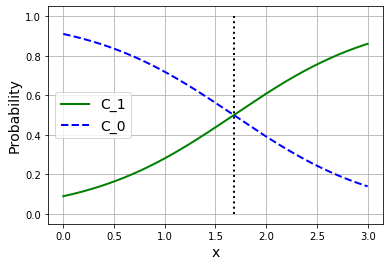

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

a=[1.14,1.22,1.18,1.34,1.24,2.12,2.36,1.86,1.64,2.92]
b=[0,0,0,0,0,1,1,1,1,1]
result_0=0 #upper for 1
result_1=0 #upper for 0
r_0_sum=0
r_1_sum=0

for i in range(len(b)):
  if b[i]== 0:
    r_0_sum+=1
  if b[i]==1:
    r_1_sum+=1

print("r_0_sum= ",r_0_sum)
print("r_1_sum= ",r_1_sum)

for i in range(len(a)):
  if b[i]==0:
    result_0+=a[i]*r_0_sum
  if b[i]==1:
    result_1+=a[i]*r_1_sum


m_0=result_0/r_0_sum
m_1=result_1/r_1_sum
print("m_0= ",m_0)
print("m_1= ",m_1)

si_0_sum=0
si_1_sum=0
for i in range(len(b)):
  if b[i]==0:
    si_0_sum+=((a[i]-m_0)**2)*r_0_sum
  if b[i]==1:
    si_1_sum+=((a[i]-m_1)**2)*r_1_sum

print("si_1_sum= ",si_1_sum)
print("si_0_sum= ",si_0_sum)

si_0=si_0_sum/r_0_sum
si_1=si_1_sum/r_1_sum
print("si**2(0) = ",si_0)
print("si**2(1) = ",si_1)

p_0=r_0_sum/len(a)
print("P(C0)= ",p_0)
p_1=r_1_sum/len(a)
print("P(C1)= ",p_1)

a=np.array(a)
a=a.reshape(-1, 1)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(a, b)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="C_1")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="C_0")
plt.grid(True)
plt.legend(loc="center left", fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("Probability", fontsize=14)

In [27]:
import math
g_0_array=[]
g_1_array=[]
pi=math.pi
si_0_sqrt=math.sqrt(si_0)
si_1_sqrt=math.sqrt(si_1)
g_0=0
g_1=0
for i in range(len(b)):
  if b[i]==0:
    g_0=0.5*math.log(2*pi) - math.log(si_0) - ((a[i]-m_0)**2)/(2*si_0) + math.log(p_0)
    g_0_array.append(g_0[0])
  if b[i]==1:
    g_1=0.5*math.log(2*pi) - math.log(si_1) - ((a[i]-m_1)**2)/(2*si_1) + math.log(p_1)
    g_1_array.append(g_1[0])
print("g_0_array= ",g_0_array) 
print("g_1_array= ",g_1_array) 



g_0_array=  [-4.664114395719056, -4.66081767775528, -4.662459363219022, -4.655972703581795, -4.660001840162018]
g_1_array=  [-5.8185739336738465, -5.813121242798183, -5.824651543220883, -5.829932656929846, -5.800985962335104]


If the priors are equal, the last term can also be dropped. If
we can further assume that variances are equal, we can write

In [28]:
g_0_dropped_array=[]
g_1_dropped_array=[]
for i in range(len(b)):
  if b[i]==0:
    g_0_dropped=-((a[i]-m_0)**2)
    g_0_dropped_array.append(g_0_dropped[0])
  if b[i]==1:
    g_1_dropped=-((a[i]-m_1)**2)
    g_1_dropped_array.append(g_1_dropped[0])

print("g_0_dropped_array= ",g_0_dropped_array)
print("g_1_dropped_array= ",g_1_dropped_array)

g_0_dropped_array=  [-24.800399999999996, -24.009999999999994, -24.403599999999994, -22.848399999999994, -23.814399999999992]
g_1_dropped_array=  [-77.08840000000002, -72.93160000000002, -81.72160000000002, -85.74759999999999, -63.680400000000006]


Choose Ci if |x −mi| = min|x −mk|

In [37]:
Ci_min=[]
for i in range(len(b)):
  if b[i]==0:
    value=np.abs(a[i]-m_0)
    Ci_min.append(value[0])
  if b[i]==1:
    value=abs(a[i]-m_1)
    Ci_min.append(value[0])

print("Ci_min= ",Ci_min)
print("min= ",min(Ci_min))
if Ci_min.index(min(Ci_min)) <=4 :
    print("Choose C_i is C_0 min is", min(Ci_min))
else:
    print("Choose C_i is C_1 min is", min(Ci_min))


midpoint=(m_0+m_1)/2

print("g0(x)= ",-((midpoint-m_0)**2)) 
print("g1(x)= ",-((midpoint-m_1)**2))
threshold_decision=0
if -((midpoint-m_0)**2) == -((midpoint-m_1)**2):
  threshold_decision=-((midpoint-m_0)**2)

print("the midpoint between the two means is the threshold of decision= ",threshold_decision)

Ci_min=  [4.9799999999999995, 4.8999999999999995, 4.9399999999999995, 4.779999999999999, 4.879999999999999, 8.780000000000001, 8.540000000000001, 9.040000000000001, 9.26, 7.98]
min=  4.779999999999999
Choose C_i is C_0 min is 4.779999999999999
g0(x)=  -5.712100000000003
g1(x)=  -5.712100000000003
the midpoint between the two means is the threshold of decision=  -5.712100000000003
